In [42]:
import os
import pdb
import numpy as np
import pandas as pd
from scipy import stats
from scipy.linalg import svd
import matplotlib.pyplot as plt
# from tabulate import tabulate
from IPython.core.display import HTML,display
import sklearn.linear_model as lm
from sklearn import model_selection
from sklearn.model_selection import KFold

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable





In [43]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
!ls drive'/My Drive/02450/'

path = 'drive/My Drive/02450/'

import sys
sys.path.append(path)

'HAPT Data Set'


In [45]:
root_path = path+'HAPT Data Set/'
x_train_path = (os.path.join(root_path,"Train","X_train.txt")) # sample as row
y_train_path = os.path.join(root_path,"Train","y_train.txt") # each sample to avtivity label
x_test_path =  os.path.join(root_path,"Test","X_test.txt")
y_test_path = os.path.join(root_path,"Test","y_test.txt") 
feature_path = os.path.join(root_path,"features.txt") # -> attributes
activity_path = os.path.join(root_path,"activity_labels.txt") # -> Y-label

In [46]:
attributeNames = pd.read_csv(feature_path, header=None, sep='/n')
attri_map = np.reshape(attributeNames.values,(-1,len(attributeNames)))
attributeNames = attri_map.T.squeeze().tolist()
attributeNames

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['tBodyAcc-Mean-1',
 'tBodyAcc-Mean-2',
 'tBodyAcc-Mean-3',
 'tBodyAcc-STD-1',
 'tBodyAcc-STD-2',
 'tBodyAcc-STD-3',
 'tBodyAcc-Mad-1',
 'tBodyAcc-Mad-2',
 'tBodyAcc-Mad-3',
 'tBodyAcc-Max-1',
 'tBodyAcc-Max-2',
 'tBodyAcc-Max-3',
 'tBodyAcc-Min-1',
 'tBodyAcc-Min-2',
 'tBodyAcc-Min-3',
 'tBodyAcc-SMA-1',
 'tBodyAcc-Energy-1',
 'tBodyAcc-Energy-2',
 'tBodyAcc-Energy-3',
 'tBodyAcc-IQR-1',
 'tBodyAcc-IQR-2',
 'tBodyAcc-IQR-3',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ARCoeff-1',
 'tBodyAcc-ARCoeff-2',
 'tBodyAcc-ARCoeff-3',
 'tBodyAcc-ARCoeff-4',
 'tBodyAcc-ARCoeff-5',
 'tBodyAcc-ARCoeff-6',
 'tBodyAcc-ARCoeff-7',
 'tBodyAcc-ARCoeff-8',
 'tBodyAcc-ARCoeff-9',
 'tBodyAcc-ARCoeff-10',
 'tBodyAcc-ARCoeff-11',
 'tBodyAcc-ARCoeff-12',
 'tBodyAcc-Correlation-1',
 'tBodyAcc-Correlation-2',
 'tBodyAcc-Correlation-3',
 'tGravityAcc-Mean-1',
 'tGravityAcc-Mean-2',
 'tGravityAcc-Mean-3',
 'tGravityAcc-STD-1',
 'tGravityAcc-STD-2',
 'tGravityAcc-STD-3',
 'tGravityAcc-M

In [47]:
letter = "t"
number = "1"
label = 0
x_train = pd.read_csv(x_train_path, header=None, sep='\s+')
x_train.columns = attributeNames
# ,"GravityAccMag-"
features = [letter + v + "Mean-" + number for v in ["BodyAccMag-","BodyAccJerkMag-","BodyGyroMag-","BodyGyroJerkMag-"]]

# X = [print(feature) for feature in features[:label] + features[label+1:]]
y = x_train[features[label]]
X = [x_train[feature] for feature in features[:label] + features[label+1:]]
X = np.array(X).T
print(X.shape)
classNames = pd.read_csv(activity_path, header=None, sep='\s+').values[:,1].squeeze().tolist()

(7767, 3)


['tBodyAccJerkMag-Mean-1', 'tBodyGyroMag-Mean-1', 'tBodyGyroJerkMag-Mean-1']


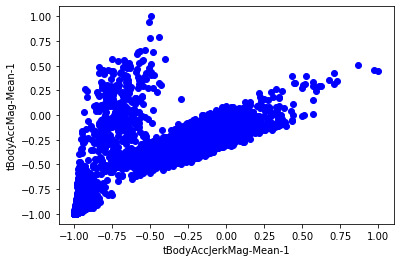

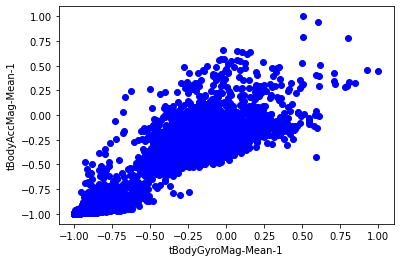

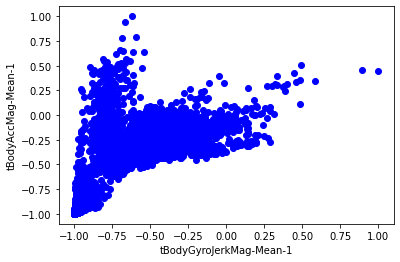

In [48]:
print(features[:label] + features[label+1:])
for feature in features[:label] + features[label+1:]:
    plt.plot(x_train[feature], x_train[features[label]], 'bo')
    plt.xlabel(feature)
    plt.ylabel(features[label])
    plt.show()



In [49]:
x_test = pd.read_csv(x_test_path, header=None, sep='\s+')
x_test.columns = attributeNames
y_test = pd.read_csv(y_test_path, header=None, sep='\s+')

x_test.columns = attributeNames
# ,"GravityAccMag-"
features = [letter + v + "Mean-" + number for v in ["BodyAccMag-","BodyAccJerkMag-","BodyGyroMag-","BodyGyroJerkMag-"]]
y = x_test[features[label]]
X = [x_test[feature] for feature in features[:label] + features[label+1:]]
X = np.array(X).T
classNames = pd.read_csv(activity_path, header=None, sep='\s+').values[:,1].squeeze().tolist()

model = lm.LinearRegression(fit_intercept=True)
model = model.fit(X,y)
model2 = y.mean()
y_est2 = np.array([model2 for i in range(len(y))])
residual2 = (y_est2-y)
y_est = model.predict(X)
residual = (y_est-y)
print(sum(a*a for a in residual))
print(sum(a*a for a in residual2))

40.09349054145108
398.95227045623756


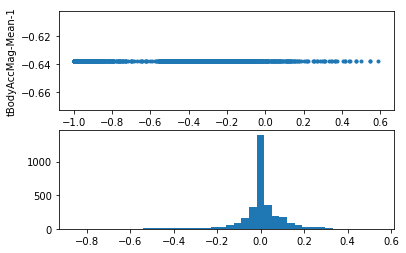

In [50]:
# Display scatter plot
plt.figure()
plt.subplot(2,1,1)
plt.plot(y, y_est2, '.')
plt.xlabel('Alcohol content (estimated)')
plt.ylabel(features[label])
plt.subplot(2,1,2)
plt.hist(residual,40)

plt.show()

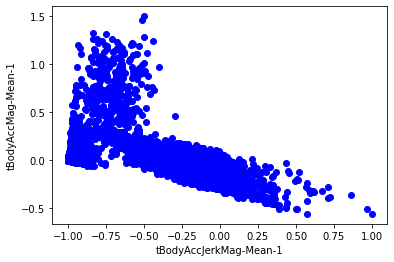

In [51]:
plt.plot(x_train[features[1]], x_train[features[0]]-x_train[features[1]], 'bo')
plt.xlabel(features[1])
plt.ylabel(features[0])
plt.show()

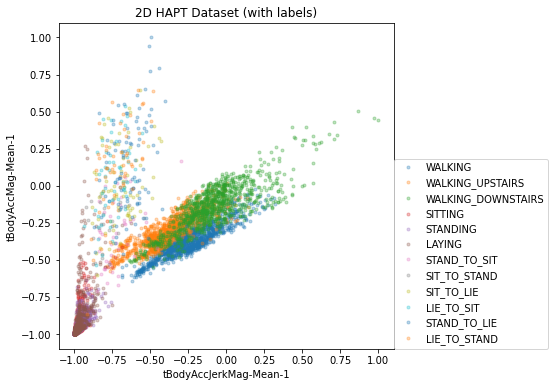

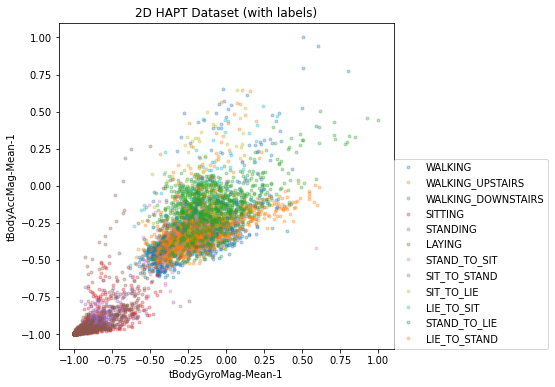

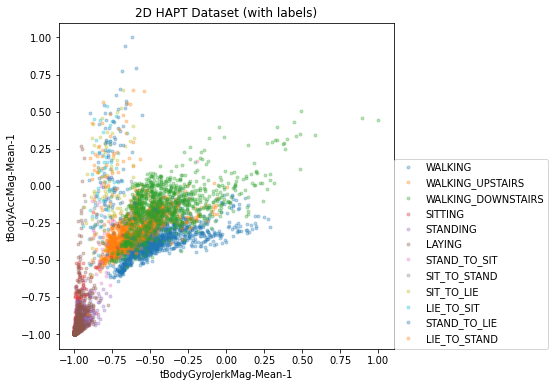

In [52]:
X = x_train.values
y_train = pd.read_csv(y_train_path, header=None, sep='\s+')
y_train = y_train.values # 7767*1
y = y_train.reshape(7767,)
for k in range(1, 4):
    i, j = attributeNames.index(features[k]), attributeNames.index(features[0])
    fig = plt.figure(figsize=(6,6))
    plt.title('2D HAPT Dataset (with labels)')
    for c in range(len(classNames)):
        # select indices belonging to class c:
        class_mask = y==c+1
        plt.plot(X[class_mask,i], X[class_mask,j], '.',alpha=.3)
    plt.legend(classNames,loc=[1, 0])
    plt.xlabel(attributeNames[i])
    plt.ylabel(attributeNames[j])
    plt.show()


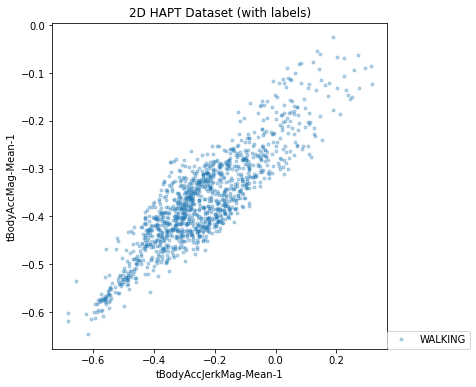

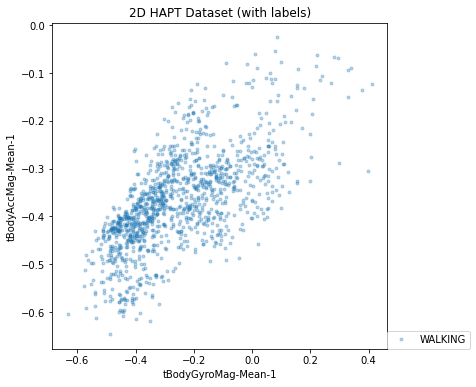

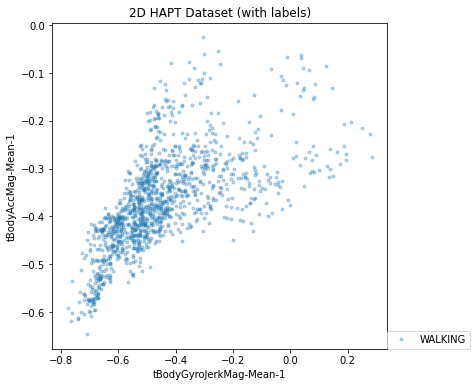

In [53]:
c = 0
X = x_train.values
y_train = pd.read_csv(y_train_path, header=None, sep='\s+')
y_train = y_train.values # 7767*1
y = y_train.reshape(7767,)
for k in range(1, 4):
    i, j = attributeNames.index(features[k]), attributeNames.index(features[0])
    fig = plt.figure(figsize=(6,6))
    plt.title('2D HAPT Dataset (with labels)')
    class_mask = y==c+1
    plt.plot(X[class_mask,i], X[class_mask,j], '.',alpha=.3)
    plt.legend(classNames,loc=[1, 0])
    plt.xlabel(attributeNames[i])
    plt.ylabel(attributeNames[j])
    plt.show()


In [54]:
# train dateset
x_train = pd.read_csv(x_train_path, header=None, sep='\s+')
x_train.columns = attributeNames
y_train = pd.read_csv(y_train_path, header=None, sep='\s+')

# test dataset
x_test = pd.read_csv(x_test_path, header=None, sep='\s+')
x_test.columns = attributeNames
y_test = pd.read_csv(y_test_path, header=None, sep='\s+')

# label map
classNames = pd.read_csv(activity_path, header=None, sep='\s+').values[:,1].squeeze().tolist()
print(classNames)

acti_dict = { 1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 
              4: 'SITTING', 5: 'STANDING', 6: 'LAYING', 7: 'STAND_TO_SIT', 
              8: 'SIT_TO_STAND', 9: 'SIT_TO_LIE', 10: 'LIE_TO_SIT', 11: 'STAND_TO_LIE', 12: 'LIE_TO_STAND'}

label = ["tBodyAccMag-Mean-1","tBodyAccJerkMag-Mean-1","tBodyGyroMag-Mean-1","tBodyGyroJerkMag-Mean-1"]


['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING', 'STAND_TO_SIT', 'SIT_TO_STAND', 'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']


In [55]:
li = []
for i in range(1, 12):
    li.append(i == y_train)
    # print(acti_index.shape)
x_data=np.concatenate((x_train[label[1:]], *li),axis=1)
# print(y_data.shape)
# print(x_data.shape)

tmp_attrs = x_data[:,:3]
y_data = x_train[label[0]]

for i in range(3):
    tmp_mean = tmp_attrs[:,i].mean()
    tmp_std = tmp_attrs[:,i].std()
    x_data[:,i] = (x_data[:,i] - tmp_mean) / tmp_std

y_data = y_data.values

Cross validation fold 1/5
Train Error: 0.006795984864833344 Test Error: 0.005115734859106611
Cross validation fold 2/5
Train Error: 0.006581315437009093 Test Error: 0.005936738758244039
Cross validation fold 3/5
Train Error: 0.006536941702296179 Test Error: 0.006182933067517064
Cross validation fold 4/5
Train Error: 0.006485789184765068 Test Error: 0.006384234729796765
Cross validation fold 5/5
Train Error: 0.005781879418856097 Test Error: 0.009207264189246143
111 0.125


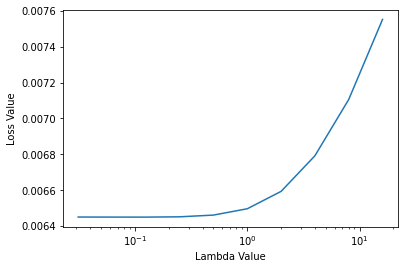

In [56]:
K = 5
lambda_value = [0.5**i for i in range(-4,16)]
Error_train_lr = np.empty((K,len(lambda_value)))
Error_test_lr = np.empty((K,len(lambda_value)))
CV = model_selection.KFold(n_splits=K,shuffle=True)

for k, (train_index, test_index) in enumerate(CV.split(x_data)):

    # extract training and test set for current CV fold
    X_train = x_data[train_index,:]
    y_train = y_data[train_index]
    X_test = x_data[test_index,:]
    y_test = y_data[test_index]
    
    # m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    for i in range(len(lambda_value)):

        m = lm.Ridge(alpha=lambda_value[i]).fit(X_train,y_train)

        Error_train_lr[k][i] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
        Error_test_lr[k][i] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    print('Cross validation fold {0}/{1}'.format(k+1,K))
    print("Train Error:",Error_train_lr[k].mean(axis=0),"Test Error:",Error_test_lr[k].mean(axis=0))

small_idx = np.argmin(Error_test_lr.mean(axis=0))


print("111",lambda_value[small_idx])

plt.plot(lambda_value[:10],Error_test_lr.mean(axis=0)[:10])
# plt.yscale('log')
plt.xscale('log')
plt.xlabel('Lambda Value')
plt.ylabel('Loss Value')
plt.show()


In [57]:
m = lm.Ridge(alpha=lambda_value[small_idx]).fit(x_data,y_data)

m.coef_

array([ 0.26029784,  0.14299791, -0.1018698 , -0.63484177, -0.56474489,
       -0.54751909, -0.68982015, -0.69292454, -0.67877603, -0.37049041,
       -0.23162025, -0.103396  , -0.06602376, -0.07514924])

In [58]:
class Net(nn.Module):
    def __init__(self, hidden_units=50):
        super(Net, self).__init__()  
        self.hidden_units = hidden_units
        
        # input layer
        self.FNN = nn.Sequential(
            nn.Linear(in_features = 14, out_features = self.hidden_units),
            nn.ReLU(inplace=True),
            nn.Linear(in_features = self.hidden_units, out_features = 1),
            # nn.ReLU(inplace=True),
            # nn.Linear(in_features = 100, out_features = 50),
            # nn.Tanh(),
            # nn.Linear(in_features = 50, out_features = 1),
        )

    def forward(self, input):
        x = self.FNN(input)
        x = x.squeeze(-1)
        return x


# net = Net()
criterion = nn.MSELoss() # y - y_est
# optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.5, weight_decay=1e-5)

BATCH_SIZE = 10
num_samples = x_data.shape[0]
NUM_EPOCHS = 5

def train_epoch(train_loader):

    Loss = []
    net.train()
    for batch_idx, (data, target) in enumerate(train_loader,0):
        
        optimizer.zero_grad()

        if torch.cuda.is_available():
          data = data.cuda()
          target = target.cuda()

        output = net(data)
        batch_loss = criterion(output, target)
        
        batch_loss.backward()
        optimizer.step()
        if torch.cuda.is_available():
          Loss.append(batch_loss.detach().cpu().numpy())
        else:
          Loss.append(batch_loss.detach().numpy())
    return Loss

def test(test_loader,data_len = 0):
    Loss = []
    net.eval()
    not_batch_loss = np.empty([1,1])
    for data, target in test_loader:

        if torch.cuda.is_available():
          data = data.cuda()
          target = target.cuda()

        output = net(data)
        batch_loss = criterion(output, target)

        if data_len != 0:
          not_batch_loss = np.append(not_batch_loss,output.detach().cpu().numpy())

        if torch.cuda.is_available():
          Loss.append(batch_loss.detach().cpu().numpy())
        else:
          Loss.append(batch_loss.detach().numpy())

    if data_len == 0:
      return Loss
    else:
      return Loss,not_batch_loss

def start(train_loader,test_loader):
    valid_accs, train_error, test_error = [], [], []
    for i in range(NUM_EPOCHS):
        train_Loss = train_epoch(train_loader)
        test_Loss = test(test_loader)
        train_error.append(np.mean(train_Loss))
        test_error.append(np.mean(test_Loss))
    # print("Train Epoch:",i," Loss :",np.mean(train_Loss),"Test_loss:",np.mean(test_Loss))
    return train_error, test_error


# def start(train_loader,test_loader):
#     valid_accs, train_error, test_error = [], [], []
#     for i in range(NUM_EPOCHS):
#         train_Loss = train_epoch(train_loader)
#         test_Loss = eval_epoch(test_loader)
#     print("Train Epoch:",i," Loss :",np.mean(train_Loss),"Test_loss:",np.mean(test_Loss))



In [59]:
# all_x = torch.from_numpy(x_data).float()
# all_y = torch.from_numpy(y_data.values).float()

# # pdb.set_trace()
# # all_x = torch.from_numpy(all_x_np).float()
# # all_y = torch.from_numpy(all_y_np).float()

# train_db = torch.utils.data.TensorDataset(all_x,all_y)

# train_size = int(0.9 * len(all_x))
# test_size = len(all_x) - train_size

# train_data,test_data = torch.utils.data.random_split(train_db,[train_size,test_size])

# train_loader = torch.utils.data.DataLoader( dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
# test_loader = torch.utils.data.DataLoader( dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

# # train_dataset, test_dataset = torch.utils.data.random_split(all_x, [train_size, test_size])

# start(train_loader,test_loader)

In [60]:
aaa = np.empty([1,1])
aaa = aaa

In [61]:
# print(torch.cuda.is_available())

# import pdb
# number_hiddens = [pow(2,i) for i in range(10)]
# print(number_hiddens)

In [63]:
data_index = np.arange(0,x_data.shape[0])
import scipy.stats as st
number_hiddens = [pow(2,i) for i in range(10)]
learning_rate = 0.0001
kf1_num = 10
kf2_num = 10
kf1 = KFold(n_splits=kf1_num)
kf2 = KFold(n_splits=kf2_num)
len_h = len(number_hiddens)

Error_train_ann = np.zeros((kf2_num,len_h))
Error_val_ann = np.zeros((kf2_num,len_h))

Error_train_lr = np.zeros((kf2_num,len(lambda_value)))
Error_var_lr = np.zeros((kf2_num,len(lambda_value)))

Error_test_ann = [None for i in range(kf1_num)]
Error_test_lr = [None for i in range(kf1_num)]
Error_test_base = [None for i in range(kf1_num)]


cal_y = []
cal_ann = []
cal_lr = []
cal_base = []

for fold_1, (par_idx,test_idx) in enumerate(kf1.split(x_data,y_data)):

    x_para_set,x_test_set = x_data[par_idx], x_data[test_idx]
    y_para_set,y_test_set = y_data[par_idx], y_data[test_idx]
    print("Start Choosing Optimal parameter")
    for fold_2, (train_idx,val_idx) in enumerate(kf2.split(x_para_set,y_para_set)):

        x_train_set,x_val_set = x_para_set[train_idx], x_para_set[val_idx]
        y_train_set,y_val_set = y_para_set[train_idx], y_para_set[val_idx]

        train_db = torch.utils.data.TensorDataset(torch.from_numpy(x_train_set).float(),torch.from_numpy(y_train_set).float())
        val_db = torch.utils.data.TensorDataset(torch.from_numpy(x_val_set).float(),torch.from_numpy(y_val_set).float())

        train_loader = torch.utils.data.DataLoader(dataset = train_db, batch_size = BATCH_SIZE, shuffle = True)   
        val_loader = torch.utils.data.DataLoader(dataset = val_db, batch_size = BATCH_SIZE, shuffle = True)
        
        # For ANN
        # print("The fold_1:",fold_1+1,"times ","The fold_2:",fold_2+1,"times .","Start Train Ann")
        for h_num in range(len(number_hiddens)):
            
            net = Net(number_hiddens[h_num])
            if torch.cuda.is_available():
              net.cuda()
            optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5, weight_decay=1e-5)
            
            train_error, val_error = start(train_loader,val_loader)

            Error_train_ann[fold_2][h_num] = sum(train_error) / len(train_error)
            Error_val_ann[fold_2][h_num] = sum(val_error) / len(val_error)
        

        # For Linear Regression
        # print("The fold_1:",fold_1+1,"times ","The fold_2:",fold_2+1,"times .","Start Train LR")
        for i in range(len(lambda_value)):

            m = lm.Ridge(alpha=lambda_value[i]).fit(x_train_set,y_train_set)
            
            Error_train_lr[fold_2][i] = np.square(y_train_set - m.predict(x_train_set)).sum() / y_train_set.shape[0]
            Error_var_lr[fold_2][i] = np.square(y_train_set - m.predict(x_train_set)).sum() / y_train_set.shape[0]
    
    # got optimal number of Hidden Units
    each_hiddenU_error = (np.sum(Error_val_ann,axis=0) / kf2_num) 
    optimal_model_index = np.argmin(each_hiddenU_error)   

    # got optimal number of Hidden Units
    small_idx = np.argmin(Error_var_lr.mean(axis=0))

    # Test for baseline
    cur_y_mean = np.sum(y_test_set) / len(y_test_set)
    base_MSE = (cur_y_mean - y_test_set) * (cur_y_mean - y_test_set)
    base_test_error = np.sum(base_MSE) / len(base_MSE)
    Error_test_base[fold_1] = base_test_error
    print("Test Baseline Model Done")

    # Test for Ann
    test_db = torch.utils.data.TensorDataset(torch.from_numpy(x_test_set).float(),torch.from_numpy(y_test_set).float())
    test_loader = torch.utils.data.DataLoader(dataset = test_db, batch_size = BATCH_SIZE, shuffle = True)

    train_db = torch.utils.data.TensorDataset(torch.from_numpy(x_para_set).float(),torch.from_numpy(y_para_set).float())
    train_loader = torch.utils.data.DataLoader(dataset = train_db, batch_size = BATCH_SIZE, shuffle = True)
    # TODO 清空网络
    net_test = Net(number_hiddens[optimal_model_index])
    if torch.cuda.is_available():
      net_test.cuda()
    optimizer = optim.SGD(net_test.parameters(), lr=learning_rate, momentum=0.5, weight_decay=1e-5)
    _ = start(train_loader,test_loader)
    each_test_err, not_batch_loss_ann = test(test_loader,y_test_set.shape[0])
    ann_test_error = sum(each_test_err) / len(each_test_err)
    Error_test_ann[fold_1] = [ann_test_error,number_hiddens[optimal_model_index]]
    print("Test Ann Model Done")

    # Test for linear Regression
    m = lm.Ridge(alpha=lambda_value[i]).fit(x_para_set,y_para_set)
    lr_test_error = np.square(y_test_set - m.predict(x_test_set)).sum() / y_test_set.shape[0]
    Error_test_lr[fold_1] = [lr_test_error,lambda_value[i]]
    print("Test LR Model Done")
    cal_y.append(y_test_set)
    cal_ann.append(not_batch_loss_ann[1:])
    cal_lr.append(m.predict(x_test_set))
    cal_base.append(np.ones((y_test_set.shape[0],1))* cur_y_mean)

    print("======================== The ",fold_1+1,"times finish ========================")
for i in range(kf1_num):
  print("The ",i+1," fold:")
  print("ANN:","Hidden Units:",Error_test_ann[i][1],"       Error:",Error_test_ann[i][0])
  print("LR:"," Lambda:",Error_test_lr[i][1],"Error:",Error_test_lr[i][0])
  print("Baseline:                     Error:",Error_test_base[i])
  print('\r')

alpha = 0.05

CIS = np.array([[None,None,None] for i in range(kf1_num)])
PS = np.array([[None,None,None] for i in range(kf1_num)])

for i in range(kf1_num):

  cal_base[i] = cal_base[i].flatten()
  z_ann = np.abs(cal_ann[i] - cal_y[i]) ** 2
  z_lr = np.abs(cal_lr[i] - cal_y[i]) ** 2
  z_base = np.abs(cal_base[i] - cal_y[i]) ** 2
  zs = [z_ann - z_lr, z_ann - z_base, z_lr - z_base]
  
  for j in range(3):
    CI_setupI = st.t.interval(1 - alpha, len(zs[j]) - 1, loc=np.mean(zs[j]), scale=st.sem(zs[j]))  # Confidence interval
    p_setupI = st.t.cdf(-np.abs(np.mean(zs[j])) / st.sem(zs[j]), df=len(zs[j]) - 1)  # p-value
    CIS[i][j] = CI_setupI
    PS[i][j] = p_setupI

for i in range(kf1_num):
  print("========== The ",i+1," Times: ==========")
  print("Compare Ann with LR:")
  print("Confidence interval:",CIS[i][0],"p-value",PS[i][0])
  print("Compare Ann with Baseline:")
  print("Confidence interval:",CIS[i][1],"p-value",PS[i][1])
  print("Compare LR with Baseline:")
  print("Confidence interval:",CIS[i][2],"p-value",PS[i][2])

Start Choosing Optimal parameter
Test Baseline Model Done
Test Ann Model Done
Test LR Model Done
======================== The  1 times finish ========================
Start Choosing Optimal parameter
Test Baseline Model Done
Test Ann Model Done
Test LR Model Done
======================== The  2 times finish ========================
Start Choosing Optimal parameter
Test Baseline Model Done
Test Ann Model Done
Test LR Model Done
======================== The  3 times finish ========================
Start Choosing Optimal parameter
Test Baseline Model Done
Test Ann Model Done
Test LR Model Done
======================== The  4 times finish ========================
Start Choosing Optimal parameter
Test Baseline Model Done
Test Ann Model Done
Test LR Model Done
======================== The  5 times finish ========================
Start Choosing Optimal parameter
Test Baseline Model Done
Test Ann Model Done
Test LR Model Done
======================== The  6 times finish =======================